# Extracting, Transforming and Selecting Features

## Objective
- Determine a process of extracting, transforming and selecting features using big data

## Hypothesis
- Extracting, transforming and selecting features can be performed only in SQL

## Procedure

In [1]:
# Run this cell
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=367910a903d64b12e301812e1a3f3de1c8a7981a2c93a3fb54a0a92bd53e5c13
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [2]:
# Run this cell
!pip install awscli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [3]:
# Run this cell
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Run this cell
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master('local[*]') \
        .appName('Basics') \
        .getOrCreate()

print(spark.version)

3.5.3


In [5]:
# Run this cell
!mkdir raw_2178
!ls

raw_2178  sample_data


In [6]:
# Run this cell
!aws s3 cp --recursive --no-sign-request s3://openaq-data-archive/records/csv.gz/locationid=2178/ raw_2178

download: s3://openaq-data-archive/records/csv.gz/locationid=2178/year=2016/month=03/location-2178-20160309.csv.gz to raw_2178/year=2016/month=03/location-2178-20160309.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=2178/year=2016/month=03/location-2178-20160307.csv.gz to raw_2178/year=2016/month=03/location-2178-20160307.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=2178/year=2016/month=03/location-2178-20160321.csv.gz to raw_2178/year=2016/month=03/location-2178-20160321.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=2178/year=2016/month=03/location-2178-20160311.csv.gz to raw_2178/year=2016/month=03/location-2178-20160311.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=2178/year=2016/month=03/location-2178-20160313.csv.gz to raw_2178/year=2016/month=03/location-2178-20160313.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=2178/year=2016/month=03/location-2178-20160310.csv.gz to ra

In [7]:
# Run this cell
df_2178 = spark.read.csv('/content/raw_2178/*/*/', inferSchema=True, header=True)
df_2178.show(5)

+-----------+----------+--------------+--------------------+-------+-----------+---------+-----+--------------------+
|location_id|sensors_id|      location|            datetime|    lat|        lon|parameter|units|               value|
+-----------+----------+--------------+--------------------+-------+-----------+---------+-----+--------------------+
|       2178|      3916|Del Norte-2178|2023-12-29T01:00:...|35.1353|-106.584702|      no2|  ppm|              0.0327|
|       2178|      3916|Del Norte-2178|2023-12-29T02:00:...|35.1353|-106.584702|      no2|  ppm|0.033100000000000004|
|       2178|      3916|Del Norte-2178|2023-12-29T03:00:...|35.1353|-106.584702|      no2|  ppm|              0.0329|
|       2178|      3916|Del Norte-2178|2023-12-29T04:00:...|35.1353|-106.584702|      no2|  ppm|              0.0298|
|       2178|      3916|Del Norte-2178|2023-12-29T05:00:...|35.1353|-106.584702|      no2|  ppm|              0.0167|
+-----------+----------+--------------+-----------------

In [8]:
# Run this cell
df_2178.count()

323458

In [9]:
# Run this cell
df_2178.printSchema()

root
 |-- location_id: string (nullable = true)
 |-- sensors_id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- datetime: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lon: string (nullable = true)
 |-- parameter: string (nullable = true)
 |-- units: string (nullable = true)
 |-- value: string (nullable = true)



In [10]:
# Run this cell
df_2178.createOrReplaceTempView('df_2178_view')

In [11]:
# Run this cell
spark.sql('''
SELECT
  *
FROM
  df_2178_view
LIMIT
  5
''').show()

+-----------+----------+--------------+--------------------+-------+-----------+---------+-----+--------------------+
|location_id|sensors_id|      location|            datetime|    lat|        lon|parameter|units|               value|
+-----------+----------+--------------+--------------------+-------+-----------+---------+-----+--------------------+
|       2178|      3916|Del Norte-2178|2023-12-29T01:00:...|35.1353|-106.584702|      no2|  ppm|              0.0327|
|       2178|      3916|Del Norte-2178|2023-12-29T02:00:...|35.1353|-106.584702|      no2|  ppm|0.033100000000000004|
|       2178|      3916|Del Norte-2178|2023-12-29T03:00:...|35.1353|-106.584702|      no2|  ppm|              0.0329|
|       2178|      3916|Del Norte-2178|2023-12-29T04:00:...|35.1353|-106.584702|      no2|  ppm|              0.0298|
|       2178|      3916|Del Norte-2178|2023-12-29T05:00:...|35.1353|-106.584702|      no2|  ppm|              0.0167|
+-----------+----------+--------------+-----------------

In [12]:
# Run this cell
spark.sql('''
WITH
distinct_parameter AS (
SELECT
  DISTINCT parameter
FROM
  df_2178_view
)
SELECT
  *
FROM
  distinct_parameter
''').show()

+---------+
|parameter|
+---------+
|      so2|
|       co|
|      nox|
|       o3|
|     pm10|
|      no2|
|       no|
|     pm25|
+---------+



In [13]:
# Run this cell
spark.sql('''
WITH
year_month_day_split AS (
SELECT
  *
  ,YEAR(datetime) AS year
  ,LPAD(MONTH(datetime), 2, 0) AS month
  ,LPAD(DAY(datetime), 2, 0) AS day
FROM
  df_2178_view
)
,year_month_day_cte AS (
SELECT
  *
  ,CONCAT(year, '-', month) AS year_month
  ,CONCAT(year, '-', month, '-', day) AS year_month_day
FROM
  year_month_day_split
)
,monthly_average AS (
SELECT
  year_month
  ,AVG(CASE WHEN parameter IN ('so2') THEN value ELSE NULL END) AS so2_mo_avg
  ,AVG(CASE WHEN parameter IN ('co') THEN value ELSE NULL END) AS co_mo_avg
  ,AVG(CASE WHEN parameter IN ('nox') THEN value ELSE NULL END) AS nox_mo_avg
  ,AVG(CASE WHEN parameter IN ('o3') THEN value ELSE NULL END) AS o3_mo_avg
  ,AVG(CASE WHEN parameter IN ('pm10') THEN value ELSE NULL END) AS pm10_mo_avg
  ,AVG(CASE WHEN parameter IN ('no2') THEN value ELSE NULL END) AS no2_mo_avg
  ,AVG(CASE WHEN parameter IN ('no') THEN value ELSE NULL END) AS no_mo_avg
  ,AVG(CASE WHEN parameter IN ('pm25') THEN value ELSE NULL END) AS pm25_mo_avg
FROM
  year_month_day_cte
GROUP BY
  year_month
)
,stats_of_monthly_average AS (
SELECT
  COUNT(pm25_mo_avg) AS count
  ,COUNT(DISTINCT pm25_mo_avg) AS countd
  ,SUM(pm25_mo_avg) AS sum
  ,AVG(pm25_mo_avg) AS avg
  ,MIN(pm25_mo_avg) AS min
  ,PERCENTILE_APPROX(pm25_mo_avg, 0.25) AS p25
  ,PERCENTILE_APPROX(pm25_mo_avg, 0.50) AS p50
  ,PERCENTILE_APPROX(pm25_mo_avg, 0.75) AS p75
  ,MAX(pm25_mo_avg) AS MAX
  ,COUNT(CASE WHEN pm25_mo_avg IS NULL THEN 1 ELSE NULL END) AS count_null
  ,COUNT(CASE WHEN pm25_mo_avg = 0 THEN 1 ELSE NULL END) AS count_zero
FROM
  monthly_average
)
SELECT
  *
FROM
  stats_of_monthly_average
''').show()

+-----+------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+----------+----------+
|count|countd|              sum|               avg|              min|              p25|              p50|              p75|               MAX|count_null|count_zero|
+-----+------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+----------+----------+
|   99|    99|575.8283552884072|5.8164480332162345|2.083307573415765|4.475326560232221|5.584911717495988|7.135600578871201|11.977947295423022|         3|         0|
+-----+------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+----------+----------+



In [14]:
# Run this cell
df_mo_avg = spark.sql('''
WITH
year_month_day_split AS (
SELECT
  *
  ,YEAR(datetime) AS year
  ,LPAD(MONTH(datetime), 2, 0) AS month
  ,LPAD(DAY(datetime), 2, 0) AS day
FROM
  df_2178_view
)
,year_month_day_cte AS (
SELECT
  *
  ,CONCAT(year, '-', month, '-01') AS year_month
  ,CONCAT(year, '-', month, '-', day) AS year_month_day
FROM
  year_month_day_split
)
,monthly_average AS (
SELECT
  year_month
  ,AVG(CASE WHEN parameter IN ('so2') THEN value ELSE NULL END) AS so2_mo_avg
  ,AVG(CASE WHEN parameter IN ('co') THEN value ELSE NULL END) AS co_mo_avg
  ,AVG(CASE WHEN parameter IN ('nox') THEN value ELSE NULL END) AS nox_mo_avg
  ,AVG(CASE WHEN parameter IN ('o3') THEN value ELSE NULL END) AS o3_mo_avg
  ,AVG(CASE WHEN parameter IN ('pm10') THEN value ELSE NULL END) AS pm10_mo_avg
  ,AVG(CASE WHEN parameter IN ('no2') THEN value ELSE NULL END) AS no2_mo_avg
  ,AVG(CASE WHEN parameter IN ('no') THEN value ELSE NULL END) AS no_mo_avg
  ,AVG(CASE WHEN parameter IN ('pm25') THEN value ELSE NULL END) AS pm25_mo_avg
FROM
  year_month_day_cte
GROUP BY
  year_month
)
SELECT
  *
FROM
  monthly_average
''')

In [15]:
# Run this cell
df_mo_avg.summary().show()

+-------+----------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
|summary|year_month|          so2_mo_avg|          co_mo_avg|          nox_mo_avg|           o3_mo_avg|       pm10_mo_avg|          no2_mo_avg|           no_mo_avg|       pm25_mo_avg|
+-------+----------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
|  count|       102|                 102|                 61|                  20|                 102|               102|                 102|                  20|                99|
|   mean|      NULL|4.216111900620057...|0.23087269488718556|0.008365129803170992| 0.03548432229278181|21.220056401039102|0.008795005058455907|0.002110824388992...| 5.816448033216236|
| stddev|      NULL|3.949914639121389E-4|0.09065640927037902|0.00603280171517042

In [16]:
# Run this cell
imputer_input = [
    'so2_mo_avg'
    ,'co_mo_avg'
    ,'nox_mo_avg'
    ,'o3_mo_avg'
    ,'pm10_mo_avg'
    ,'no2_mo_avg'
    ,'no_mo_avg'
    ,'pm25_mo_avg'
  ]
imputer_output = [
     'so2_mo_avg_impute'
    ,'co_mo_avg_impute'
    ,'nox_mo_avg_impute'
    ,'o3_mo_avg_impute'
    ,'pm10_mo_avg_impute'
    ,'no2_mo_avg_impute'
    ,'no_mo_avg_impute'
    ,'pm25_mo_avg_impute'
  ]

assembler_input = imputer_output
assembler_output = 'assembler_output'

scaler_input = assembler_output
scaler_output = 'scaler_output'

In [17]:
# Run this cell
from pyspark.ml.feature import VectorAssembler, Imputer, StandardScaler
from pyspark.ml.pipeline import Pipeline

imputer = Imputer(inputCols=imputer_input, outputCols=imputer_output)
assembler = VectorAssembler().setInputCols(assembler_input).setOutputCol(assembler_output)
scaler = StandardScaler(inputCol=scaler_input, outputCol=scaler_output)
pipeline = Pipeline(stages=[imputer, assembler, scaler])

In [18]:
# Run this cell
pipeline_model = pipeline.fit(df_mo_avg)

In [19]:
# Run this cell
df_pipeline = pipeline_model.transform(df_mo_avg)
df_pipeline.show(5)

+----------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+--------------------+
|year_month|          so2_mo_avg|          co_mo_avg|          nox_mo_avg|           o3_mo_avg|       pm10_mo_avg|          no2_mo_avg|           no_mo_avg|       pm25_mo_avg|   so2_mo_avg_impute|   co_mo_avg_impute|   nox_mo_avg_impute|    o3_mo_avg_impute|pm10_mo_avg_impute|   no2_mo_avg_impute|    no_mo_avg_impute|pm25_mo_avg_impute|    assembler_output|       scaler_output|
+----------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+-------------------+--------------------+-

In [20]:
# Run this cell
from pyspark.ml.functions import vector_to_array

df_array = df_pipeline.withColumn('array_scaler_output', vector_to_array("scaler_output"))
df_array.show(5)

+----------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+
|year_month|          so2_mo_avg|          co_mo_avg|          nox_mo_avg|           o3_mo_avg|       pm10_mo_avg|          no2_mo_avg|           no_mo_avg|       pm25_mo_avg|   so2_mo_avg_impute|   co_mo_avg_impute|   nox_mo_avg_impute|    o3_mo_avg_impute|pm10_mo_avg_impute|   no2_mo_avg_impute|    no_mo_avg_impute|pm25_mo_avg_impute|    assembler_output|       scaler_output| array_scaler_output|
+----------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+

In [21]:
# Run this cell
df_scale = df_array.withColumn('so2_mo_avg_scale', df_array['array_scaler_output'].getItem(0))\
.withColumn('co_mo_avg_scale', df_array['array_scaler_output'].getItem(1))\
.withColumn('nox_mo_avg_scale', df_array['array_scaler_output'].getItem(2))\
.withColumn('o3_mo_avg_scale', df_array['array_scaler_output'].getItem(3))\
.withColumn('pm10_mo_avg_scale', df_array['array_scaler_output'].getItem(4))\
.withColumn('no2_mo_avg_scale', df_array['array_scaler_output'].getItem(5))\
.withColumn('no_mo_avg_scale', df_array['array_scaler_output'].getItem(6))\
.withColumn('pm25_mo_avg_scale', df_array['array_scaler_output'].getItem(7))

df_scale.show(5)

+----------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-------------------+------------------+
|year_month|          so2_mo_avg|          co_mo_avg|          nox_mo_avg|           o3_mo_avg|       pm10_mo_avg|          no2_mo_avg|           no_mo_avg|       pm25_mo_avg|   so2_mo_avg_impute|   co_mo_avg_impute|   nox_mo_avg_impute|    o3_mo_avg_impute|pm10_mo_avg_impute|   no2_mo_avg_impute|    no_mo_avg_impute|pm25_mo_avg_impute|    assembler_output|       scaler_output| array_scaler_output|  so2_mo_avg_scale|   co_mo_avg_scale| nox_mo_

In [22]:
# Run this cell
df_scale.createOrReplaceTempView('df_scale_view')

In [23]:
# Run this cell
df_2023 = spark.sql('''
SELECT
  *
  ,MONTH(year_month) AS month
FROM
  df_scale_view
WHERE
  year_month BETWEEN '2023-01-01' AND '2023-12-01'
''')

df_2023.show(5)

+----------+----------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+-----------------+-----------------+-------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----+
|year_month|so2_mo_avg|          co_mo_avg|          nox_mo_avg|           o3_mo_avg|       pm10_mo_avg|          no2_mo_avg|           no_mo_avg|      pm25_mo_avg|so2_mo_avg_impute|   co_mo_avg_impute|   nox_mo_avg_impute|    o3_mo_avg_impute|pm10_mo_avg_impute|   no2_mo_avg_impute|    no_mo_avg_impute|pm25_mo_avg_impute|    assembler_output|       scaler_output| array_scaler_output|so2_mo_avg_scale|  co_mo_avg_scale|  nox_mo_avg_scale|  o3_mo_avg_scale

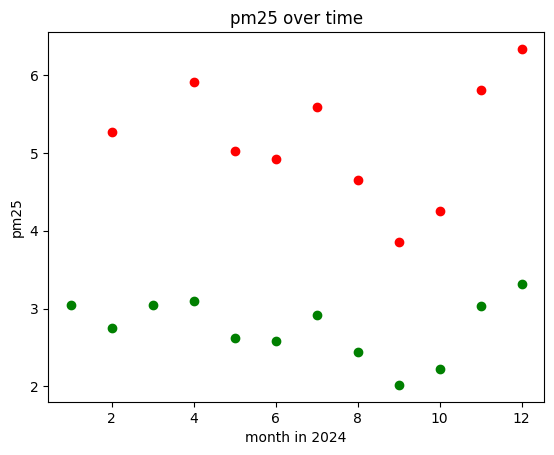

In [24]:
# Run this cell
x = [val.month for val in df_2023.select('month').collect()]
y1 = [val.pm25_mo_avg for val in df_2023.select('pm25_mo_avg').collect()]
y2 = [val.pm25_mo_avg_scale for val in df_2023.select('pm25_mo_avg_scale').collect()]

plt.scatter(x, y1, c='red')
plt.scatter(x, y2, c='green')
plt.xlabel('month in 2024')
plt.ylabel('pm25')
plt.title('pm25 over time')
plt.show()

## Observation and Analysis

Based on my observations, the data was successfully pulled from AWS S3 storage, read into a Spark environment, and an initial exploration will be carried out by using the methods .show() and .printSchema() to verify every column about the schema of the data. I believe, it in-takes considerable amount of records, which is 323,458. It has details such as location, date and time, latitude and longitude, air quality details such as no2, so2, pm25, and values associated with these.

For this procedure, I think that the data is first searched using Spark SQL to find unique air quality parameters. The methods in Spark SQL are then used to divide it into year, month, and day parts. Furthermore, a monthly average of each air quality measure is calculated using the AVG() function, so every measure shows a very clear overview of monthly trends for each pollutant.

The process makes use of several changes like calculating monthly averages and summary statistics (count, mean, standard deviation, min, max, etc.) to better understand how every pollutant is spread out. I have also observed that, missing values were replaced using Imputer that substituted NULL values by the average of a column. This way, later analysis will not be impaired by missing data.

Meanwhile, I think that the features are assembled into one vector for scaling. Scale with the StandardScaler on assembled data so that it is normal. In my perspective, scaling is crucial for models that predict the data on a common scale. The altered properties are returned to personal columns to enable easy analysis, and a particular section of the data year 2023 is chosen for deeper scrutiny.

As for the image or the data visualization, a scatter plot was developed that presents the relationship between pm25 monthly averages and their scaled values each month in 2023. This visualization allows me to compare the original pm25 values with its scaled version and gives insight into how similar or dissimilar the levels of pollution are.

## Conclusion

Therefore, I conclude that, the objective of the procedure has been accomplished. The code makes a thorough job in extracting information from a large dataset, transforming it into monthly averages, and picking features for further analysis by means of SQL and PySpark. Specifically, in this response, the code will collect, clean, fill in missing values, transform, and even adjust with both SQL queries and PySpark's MLlib.

Meanwhile, the hypothesis "Extracting, transforming and selecting features can be performed only in SQL" is partially valid. I believe that SQL plays a powerful role in performing initial data analysis, feature extraction, and transformation, particularly when the framework like Spark SQL is used. However, for transforming data with complex features such as vector assembly and scaling, SQL may not be enough to do, and even PySpark's MLlib requires to be used. Furthermore, SQL alone cannot handle advanced data changes like scaling and making machine learning pipelines. Therefore, SQL was just a small component of the entire process, and by no means could it handle the entire workflow on its own. Using PySpark had to fill in all the missing gaps, particularly for data scaling and for transforming vectors that cannot be done in SQL.

Moreover, using SQL for gathering data and PySpark's tools for machine learning helps with scaling and changing data formats. This shows how useful these tools are when working with big data.

Hence, the analysis could then be extended further with more machine learning models or clustering techniques applied to the extracted features, possibly to identify trends or anomalies in air quality over time.

# Optional Challenge:
Produce a new dataframe named df_normalize that applies Normalizer() method from pyspark.mllib.feature. How to import:
from pyspark.ml.feature import Normalizer